In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.cm as cm

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_samples,silhouette_score


In [25]:
beras = pd.read_csv('beras.csv')
beras.head()

,Country,Netto,CIF
0,Vietnam,8973929.9,3336257.3
1,Thailand,5884429.9,2134647.2
2,Tiongkok,1582007.8,463422.3
3,India,1019299.9,305743.5
4,Pakistan,732306.3,234729.0


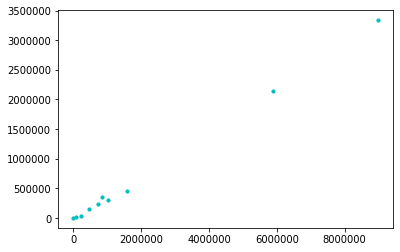

In [26]:
plt.scatter(beras.Netto , beras.CIF, s =10, c = 'c', marker = 'o', alpha = 1)
plt.show()

In [27]:
beras_x = beras.iloc[:, 1:3]
beras_x.head()

,Netto,CIF
0,8973929.9,3336257.3
1,5884429.9,2134647.2
2,1582007.8,463422.3
3,1019299.9,305743.5
4,732306.3,234729.0


In [28]:
x_array = np.array(beras_x)
print(x_array)

[[8.9739299e+06 3.3362573e+06]
 [5.8844299e+06 2.1346472e+06]
 [1.5820078e+06 4.6342230e+05]
 [1.0192999e+06 3.0574350e+05]
 [7.3230630e+05 2.3472900e+05]
 [4.5579050e+05 1.5490450e+05]
 [7.0968500e+04 2.0237800e+04]
 [3.1568000e+03 1.7795000e+03]
 [2.1232190e+05 3.5435100e+04]
 [8.5182400e+05 3.4691740e+05]]


In [29]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_array)
x_scaled

array([[1.        , 1.        ],
       [0.65560382, 0.6396407 ],
       [0.17599944, 0.13844531],
       [0.11327263, 0.0911579 ],
       [0.08128056, 0.06986086],
       [0.05045649, 0.04592173],
       [0.00755918, 0.00553559],
       [0.        , 0.        ],
       [0.02331628, 0.01009321],
       [0.09460357, 0.10350583]])

In [30]:
kmeans = KMeans(n_clusters = 3, random_state=123)

In [31]:
kmeans.fit(x_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [32]:
print(kmeans.cluster_centers_)

[[0.06831102 0.05806506]
 [0.65560382 0.6396407 ]
 [1.         1.        ]]


In [33]:
beras['kluster'] = kmeans.labels_

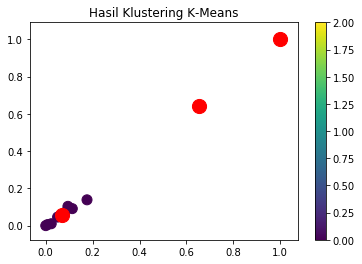

In [34]:
output = plt.scatter(x_scaled[:,0], x_scaled[:,1], s = 100, c = beras.kluster, marker = 'o', alpha = 1, )
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=1 , marker='o');
plt.title('Hasil Klustering K-Means')
plt.colorbar (output)
plt.show()

In [35]:
beras.head()

,Country,Netto,CIF,kluster
0,Vietnam,8973929.9,3336257.3,2
1,Thailand,5884429.9,2134647.2,1
2,Tiongkok,1582007.8,463422.3,0
3,India,1019299.9,305743.5,0
4,Pakistan,732306.3,234729.0,0


In [36]:
silhouette_avg = silhouette_score(beras_x, kmeans.labels_)
print('The average silhouette_score is :', silhouette_avg)


The average silhouette_score is : 0.7010010581169568


For n_clusters = 2 The average silhouette_score is : 0.8280281504503817
For n_clusters = 3 The average silhouette_score is : 0.7010010581169568
For n_clusters = 4 The average silhouette_score is : 0.45367458671445365
For n_clusters = 5 The average silhouette_score is : 0.42706971567798613
For n_clusters = 6 The average silhouette_score is : 0.3209762862628355


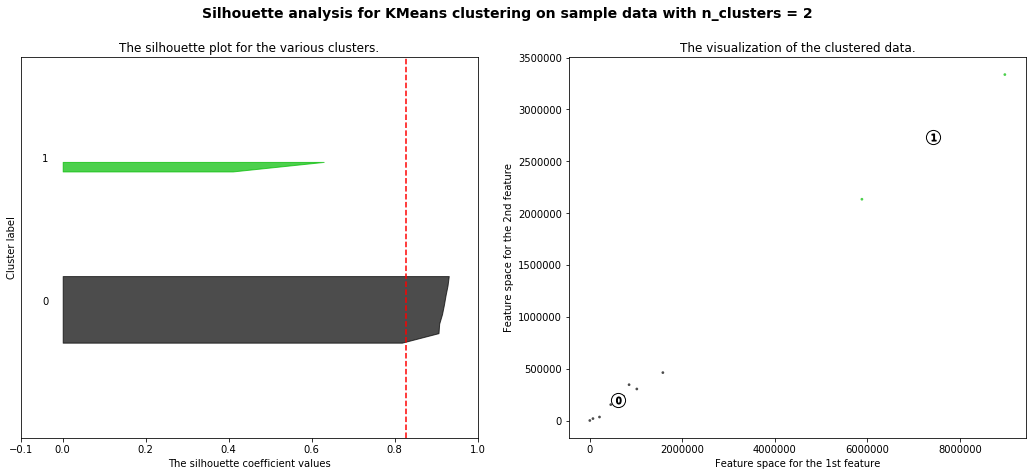

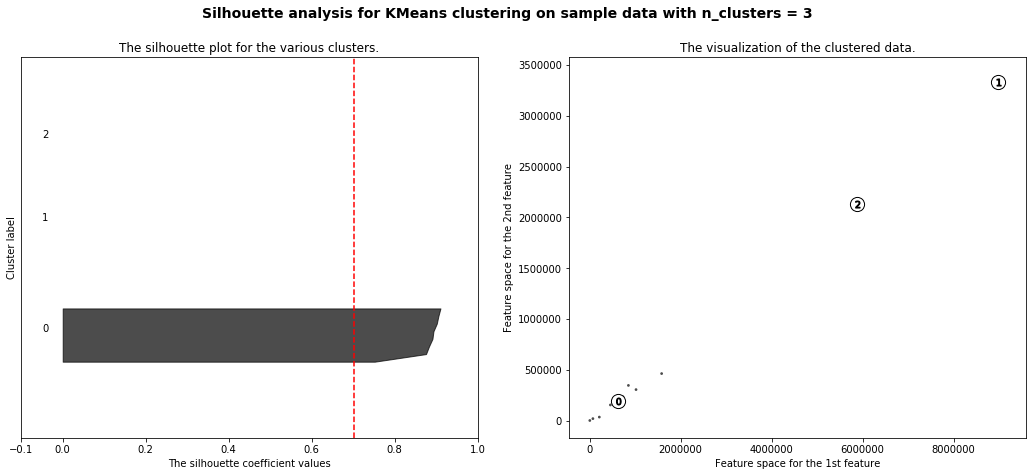

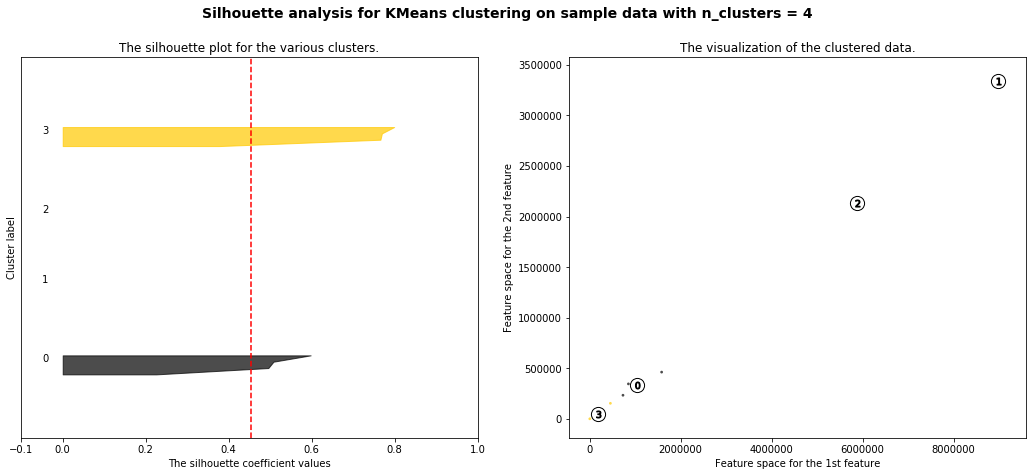

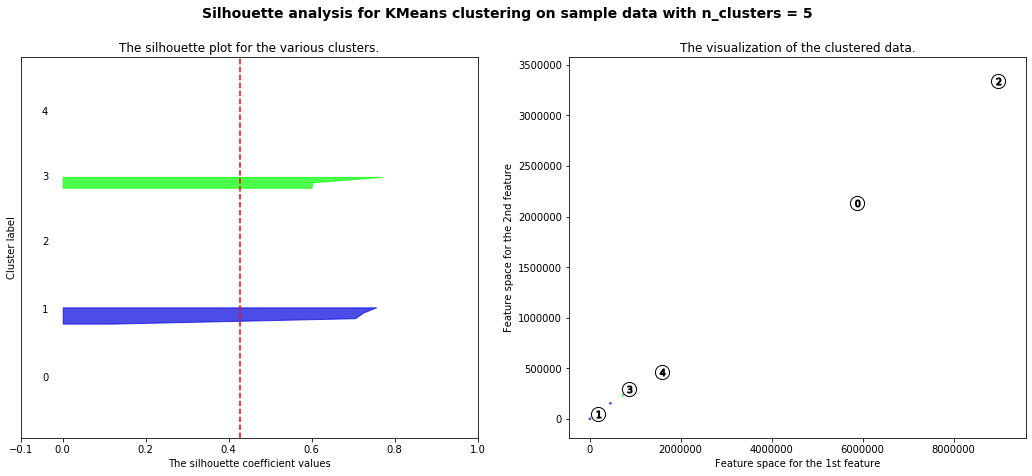

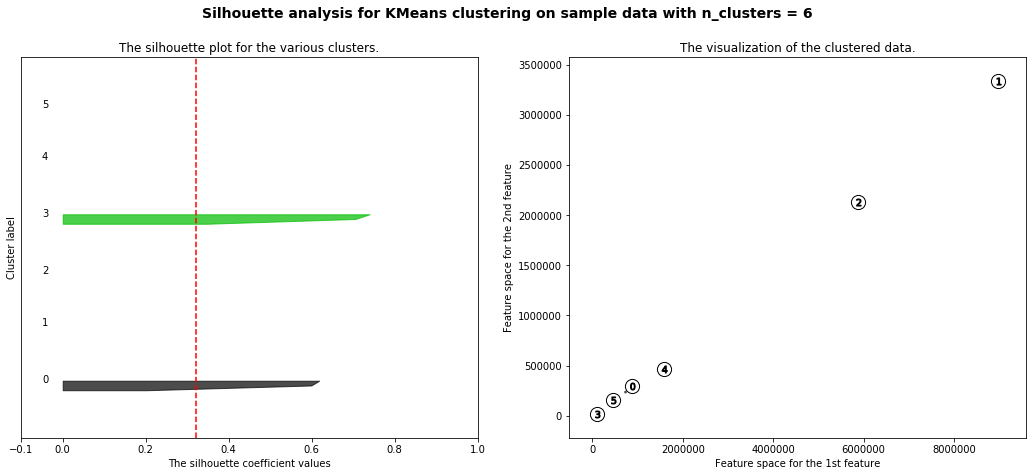

In [38]:
range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(beras_x) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(beras_x)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(beras_x, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(beras_x, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(beras_x.iloc[:, 0], beras_x.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()